In [297]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import font_manager, rc
font_path = 'C:/Windows/Fonts/Malgun.ttf'
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font)

In [258]:
df = pd.read_csv('./Data/Data.csv',encoding='utf-8')
df.head(2)

,품종,색상,성별,체중,중성화여부,당시의나이,보호소형태,상태
0,7,1,0,3.10,0,3,1,1
1,3,2,0,7.95,0,3,1,1


In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361195 entries, 0 to 361194
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   품종      361195 non-null  int64  
 1   색상      361195 non-null  int64  
 2   성별      361195 non-null  int64  
 3   체중      361195 non-null  float64
 4   중성화여부   361195 non-null  int64  
 5   당시의나이   361195 non-null  int64  
 6   보호소형태   361195 non-null  int64  
 7   상태      361195 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 22.0 MB


In [260]:
df['품종'] = df['품종'].astype('category')
df['색상'] = df['색상'].astype('category')
df['성별'] = df['성별'].astype('category')
df['중성화여부'] = df['중성화여부'].astype('category')
df['보호소형태'] = df['보호소형태'].astype('category')
df['상태'] = df['상태'].astype('category')

In [261]:
df['상태'].value_counts()

0    225087
1    136108
Name: 상태, dtype: int64

### 데이터 표준화(StandardScaler) - 큰 변화 없는 듯(lightgbm 0.68)

In [231]:
scale_data = df[['체중','당시의나이']]

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(scale_data)
df_scaled = scaler.transform(scale_data)
df_scaled = pd.DataFrame(data = df_scaled, columns = scale_data.columns)

# scaler.fit(df['체중'])
# df['체중'] = scaler.transform(df['체중'])
# scaler.fit(df['당시의나이'])
# df['당시의나이'] = scaler.transform(df['당시의나이'])

In [16]:
df_scaled.head()

,체중,당시의나이
0,-0.530272,0.500960
1,0.264622,0.500960
2,-0.587635,0.082589
3,-0.382766,-0.335782
4,-0.546661,1.337703


In [17]:
df['체중'] = df_scaled['체중']
df['당시의나이'] = df_scaled['당시의나이']

In [18]:
df.head()

,품종,색상,성별,체중,중성화여부,당시의나이,보호소형태,상태
0,7,1,0,-0.530272,0,0.500960,1,1
1,3,2,0,0.264622,0,0.500960,1,1
2,4,4,1,-0.587635,0,0.082589,1,1
3,4,3,0,-0.382766,1,-0.335782,1,1
4,7,3,1,-0.546661,1,1.337703,1,1


### 원-핫 인코딩

In [77]:
df['품종'].unique()

[29, 38, 150, 79, 35, ..., 11, 5, 141, 61, 16]
Length: 164
Categories (164, int64): [29, 38, 150, 79, ..., 5, 141, 61, 16]

In [86]:
품종 = pd.get_dummies(df['품종'])
품종.columns = ['품종_0', '품종_1', '품종_2', '품종_3', '품종_4', '품종_5', '품종_6', '품종_7', '품종_8', '품종_9']
df = pd.concat([df, 품종], axis = 1)
df.drop('품종', axis = 1, inplace = True)

In [ ]:
df.head(1)

In [42]:
df['성별'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [36]:
색상 = pd.get_dummies(df['색상'])
색상.columns = ['색상_1', '색상_2', '색상_3', '색상_4', '색상_5']
df = pd.concat([df, 색상], axis = 1)
df.drop('색상', axis = 1, inplace = True)
df.head(1)

,성별,체중,중성화여부,당시의나이,보호소형태,상태,품종_0,품종_1,품종_2,품종_3,...,품종_5,품종_6,품종_7,품종_8,품종_9,색상_1,색상_2,색상_3,색상_4,색상_5
0,0,3.1,0,3,1,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [37]:
중성화 = pd.get_dummies(df['중성화여부'])
중성화.columns = ['중성화_0', '중성화_1', '중성화_2']
df = pd.concat([df, 중성화], axis = 1)
df.drop('중성화여부', axis = 1, inplace = True)
df.head(1)

,성별,체중,당시의나이,보호소형태,상태,품종_0,품종_1,품종_2,품종_3,품종_4,...,품종_8,품종_9,색상_1,색상_2,색상_3,색상_4,색상_5,중성화_0,중성화_1,중성화_2
0,0,3.1,3,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [43]:
성별 = pd.get_dummies(df['성별'])
성별.columns = ['성별_0', '성별_1']
df = pd.concat([df, 성별], axis = 1)
df.drop('성별', axis = 1, inplace = True)
df.head(1)

,체중,당시의나이,보호소형태,상태,품종_0,품종_1,품종_2,품종_3,품종_4,품종_5,...,색상_1,색상_2,색상_3,색상_4,색상_5,중성화_0,중성화_1,중성화_2,성별_0,성별_1
0,3.1,3,1,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [263]:
df_no_mix = df[df['품종']!=3]

In [264]:
df_no_mix

,품종,색상,성별,체중,중성화여부,당시의나이,보호소형태,상태
0,7,1,0,3.10,0,3,1,1
2,4,4,1,2.75,0,2,1,1
3,4,3,0,4.00,1,1,1,1
4,7,3,1,3.00,1,5,1,1
5,7,5,1,5.00,1,6,1,0
...,...,...,...,...,...,...,...,...
361190,9,1,1,6.00,0,0,0,0
361191,9,3,0,8.00,0,0,0,0
361192,9,5,1,1.86,0,0,0,0
361193,9,1,0,1.75,0,0,0,0


In [265]:
df_mix = df[df['품종']==3]

In [266]:
df_mix.columns

Index(['품종', '색상', '성별', '체중', '중성화여부', '당시의나이', '보호소형태', '상태'], dtype='object')

## DecisionTree

In [262]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz

In [267]:
dt_clf = DecisionTreeClassifier(random_state = 24, max_leaf_nodes = 10)
# X = df_no_mix[['색상', '성별', '체중', '중성화여부', '당시의나이', '보호소형태', '품종_0', '품종_1',
#        '품종_2','품종_4', '품종_5', '품종_6', '품종_7', '품종_8', '품종_9']]
X = df_no_mix[['품종', '색상', '성별', '체중', '중성화여부', '당시의나이', '보호소형태']]
X_train, X_test, y_train, y_test = train_test_split(X, df_no_mix['상태'], test_size = 0.2, random_state = 23)
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=24, splitter='best')

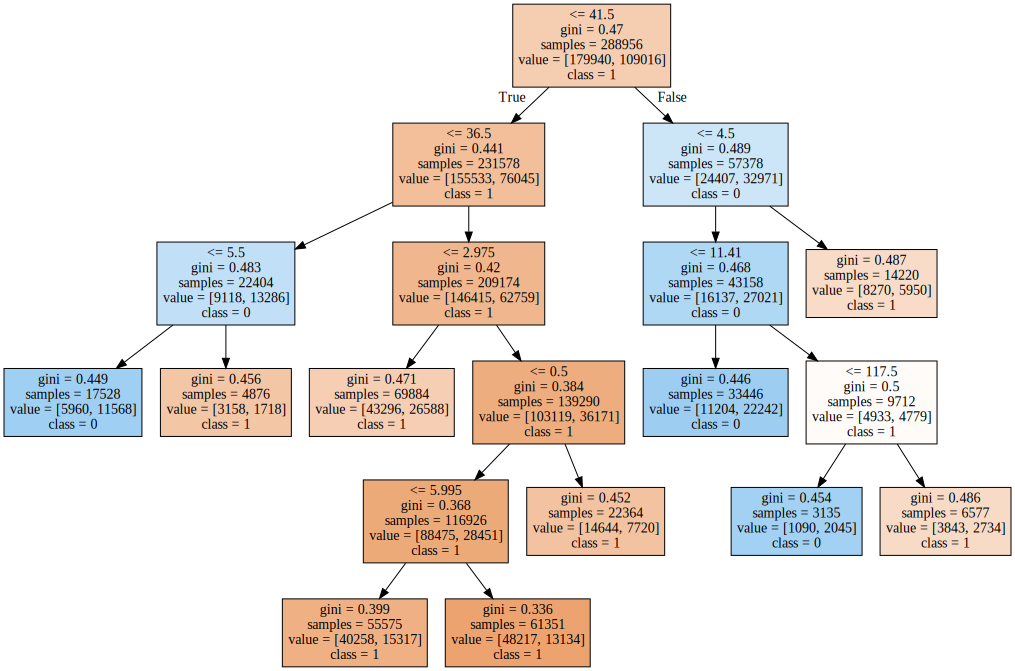

In [7]:
export_graphviz(dt_clf, out_file = 'tree.dot', class_names = np.array(['1','0']), feature_names = df.iloc[:,:-1].columns, impurity = True, filled = True)
with open('tree.dot','rt', encoding='UTF8') as f : 
    dot_graph = f.read()
graphviz.Source(dot_graph)

품종 : 0.338
색상 : 0.000
성별 : 0.000
체중 : 0.063
중성화여부 : 0.000
당시의나이 : 0.599
보호소형태 : 0.000


<AxesSubplot:>

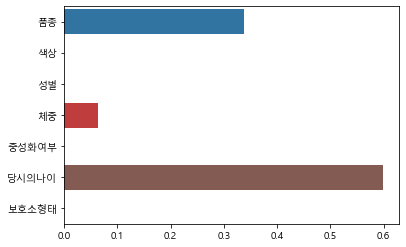

In [102]:
for name, value in zip(X.columns, dt_clf.feature_importances_) : 
    print('{0} : {1:.3f}'.format(name, value))
sns.barplot(x = dt_clf.feature_importances_, y = X.columns)

## LightGBM

In [268]:
from lightgbm import LGBMClassifier
from lightgbm import plot_importance, plot_metric, plot_tree
from sklearn.model_selection import train_test_split, cross_validate

lgbm_wrapper_classifier = LGBMClassifier(n_estimators = 200)
evals = [(X_test, y_test)]
lgbm_wrapper_classifier.fit(X_train, y_train, early_stopping_rounds = 50, eval_metric = 'logloss', eval_set = evals, verbose = True)
preds = lgbm_wrapper_classifier.predict(X_test)
pred_proba = lgbm_wrapper_classifier.predict_proba(X_test)[:,1]

[1]	valid_0's binary_logloss: 0.670946
Training until validation scores don't improve for 50 rounds
[2]	valid_0's binary_logloss: 0.663046
[3]	valid_0's binary_logloss: 0.656648
[4]	valid_0's binary_logloss: 0.6514
[5]	valid_0's binary_logloss: 0.646994
[6]	valid_0's binary_logloss: 0.643279
[7]	valid_0's binary_logloss: 0.640143
[8]	valid_0's binary_logloss: 0.637631
[9]	valid_0's binary_logloss: 0.635349
[10]	valid_0's binary_logloss: 0.633577
[11]	valid_0's binary_logloss: 0.632043
[12]	valid_0's binary_logloss: 0.63063
[13]	valid_0's binary_logloss: 0.629405
[14]	valid_0's binary_logloss: 0.628464
[15]	valid_0's binary_logloss: 0.627553
[16]	valid_0's binary_logloss: 0.626743
[17]	valid_0's binary_logloss: 0.626086
[18]	valid_0's binary_logloss: 0.625591
[19]	valid_0's binary_logloss: 0.625141
[20]	valid_0's binary_logloss: 0.62469
[21]	valid_0's binary_logloss: 0.62435
[22]	valid_0's binary_logloss: 0.623958
[23]	valid_0's binary_logloss: 0.623558
[24]	valid_0's binary_logloss: 0.

In [269]:
cross_val = cross_validate(estimator = lgbm_wrapper_classifier, X = X, y = df_no_mix['상태'], cv = 3)
print(cross_val['test_score'])
print('avg test score : {:.4f} (+/-{:.4f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

[0.64219583 0.65406371 0.64507294]
avg test score : 0.6471 (+/-0.0051)


<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

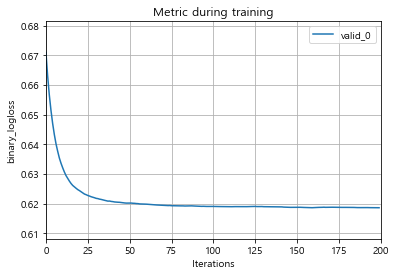

In [270]:
plot_metric(lgbm_wrapper_classifier)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

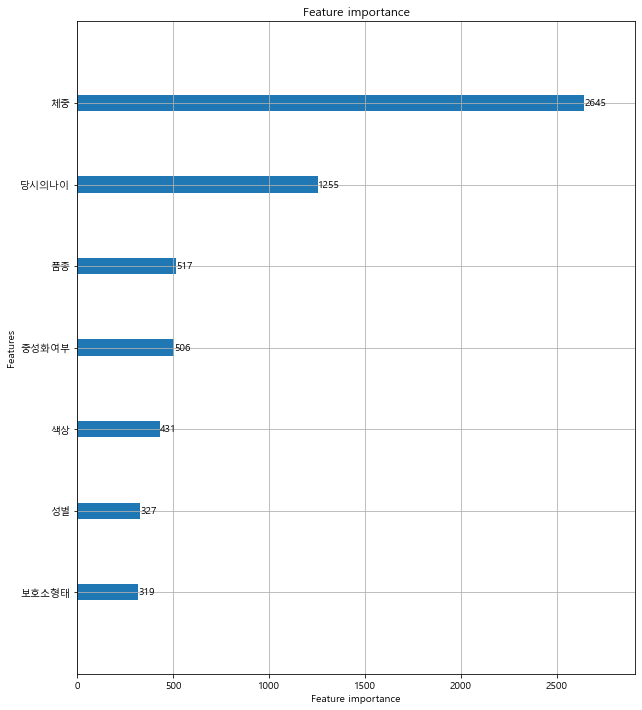

In [271]:
from lightgbm import plot_importance
fig, ax = plt.subplots(figsize = (10, 12))
plot_importance(lgbm_wrapper_classifier, ax = ax)

### Stacking

In [325]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [326]:
df_no_mix.columns

Index(['품종', '색상', '성별', '체중', '중성화여부', '당시의나이', '보호소형태', '상태'], dtype='object')

In [382]:
X_data = df_no_mix[['품종', '색상', '성별', '체중', '중성화여부', '당시의나이', '보호소형태']]
X_data = pd.get_dummies(X_data,columns=['품종','색상','성별','중성화여부','보호소형태'],prefix=['품종','색상','성별','중성화여부','보호소형태'])

y_label = df_no_mix['상태']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_label, test_size = 0.25, random_state = 0, stratify=y_label)

In [383]:
knn_clf = KNeighborsClassifier(n_neighbors = 7)
rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators = 100)
mlp_clf = MLPClassifier()

lr_final = LogisticRegression(C = 0.5)

In [384]:
knn_clf.fit(X_train, y_train) 
rf_clf.fit(X_train, y_train) 
dt_clf.fit(X_train, y_train) 
ada_clf.fit(X_train, y_train) 
mlp_clf.fit(X_train,y_train)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [385]:
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)
mlp_pred = mlp_clf.predict(X_test)



print('KNN 정확도 : {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도 : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정 트리 정확도 : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도 : {0:.4f}'.format(accuracy_score(y_test, ada_pred)))
print('MLPClassfier 정확도 : {0:.4f}'.format(accuracy_score(y_test, mlp_pred)))

KNN 정확도 : 0.6295
랜덤 포레스트 정확도 : 0.6325
결정 트리 정확도 : 0.6194
에이다부스트 정확도 : 0.6530
MLPClassfier 정확도 : 0.6571


In [386]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred, mlp_pred])
pred = np.transpose(pred)

In [387]:
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print('최종 메타 모델의 예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, final)))

최종 메타 모델의 예측 정확도 : 0.6609


In [388]:
from sklearn.metrics import f1_score

In [389]:
f1_score(y_test, final)

0.7376535626535627

#### one-hot 안한거는 최종 0.68

## AdaBoost

In [121]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [122]:
df_no_mix

,품종,색상,성별,체중,중성화여부,당시의나이,보호소형태,상태
0,7,1,0,3.10,0,3,1,1
2,4,4,1,2.75,0,2,1,1
3,4,3,0,4.00,1,1,1,1
4,7,3,1,3.00,1,5,1,1
5,7,5,1,5.00,1,6,1,0
...,...,...,...,...,...,...,...,...
361190,9,1,1,6.00,0,0,0,0
361191,9,3,0,8.00,0,0,0,0
361192,9,5,1,1.86,0,0,0,0
361193,9,1,0,1.75,0,0,0,0


In [175]:
# X = df_no_mix[['품종', '색상', '성별', '체중', '중성화여부', '당시의나이', '보호소형태']]
X = df_no_mix[['품종', '체중', '당시의나이']]
# X = df_no_mix[['품종', '색상', '성별', '중성화여부', '당시의나이', '보호소형태']]
X_train, X_test, y_train, y_test = train_test_split(X, df_no_mix['상태'], test_size = 0.2, random_state = 23)
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [176]:
ada_clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 1), n_estimators = 200, algorithm = 'SAMME', learning_rate = 0.5, random_state = 42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                            

In [177]:
# start_time = time.time()

ada_pred = ada_clf.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_pred)

print('ADA 정확도 : {0:.4f}'.format(ada_accuracy))
# print('ADA 수행시간 : {0:.1f}초'.format(time.time() - start_time))

ADA 정확도 : 0.6415


In [126]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators' : [100, 300, 500], 'learning_rate' : [0.05, 0.1, 0.3]}

grid_cv = GridSearchCV(ada_clf, param_grid = params, cv = 3, verbose = 1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터 : \n', grid_cv.best_params_)
print('최고 예측 정확도 : {0:.4f}'.format(grid_cv.best_score_))

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  1.6min finished


최적 하이퍼 파라미터 : 
 {'learning_rate': 0.3, 'n_estimators': 500}
최고 예측 정확도 : 0.6465


In [127]:
ada_pred = grid_cv.best_estimator_.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_pred)

print('ADA 정확도 : {0:.4f}'.format(ada_accuracy))

ADA 정확도 : 0.6476


## autoencoder

In [44]:
df_mix = df[df['품종_3']==1]

In [45]:
df_mix.columns

Index(['체중', '당시의나이', '보호소형태', '상태', '품종_0', '품종_1', '품종_2', '품종_3', '품종_4',
       '품종_5', '품종_6', '품종_7', '품종_8', '품종_9', '색상_1', '색상_2', '색상_3', '색상_4',
       '색상_5', '중성화_0', '중성화_1', '중성화_2', '성별_0', '성별_1'],
      dtype='object')

In [46]:
df_mix=df_mix[['체중', '당시의나이', '보호소형태', '상태', '품종_0', '품종_1', '품종_2', '품종_4',
       '품종_5', '품종_6', '품종_7', '품종_8', '품종_9', '색상_1', '색상_2', '색상_3', '색상_4',
       '색상_5', '중성화_0', '중성화_1', '중성화_2', '성별_0', '성별_1']]

In [87]:
df_no_mix = df[df['품종_3']==0]

In [89]:
df_no_mix.columns

Index(['색상', '성별', '체중', '중성화여부', '당시의나이', '보호소형태', '상태', '품종_0', '품종_1',
       '품종_2', '품종_3', '품종_4', '품종_5', '품종_6', '품종_7', '품종_8', '품종_9'],
      dtype='object')

In [90]:
df_no_mix = df_no_mix[['색상', '성별', '체중', '중성화여부', '당시의나이', '보호소형태', '상태', '품종_0', '품종_1',
       '품종_2', '품종_4', '품종_5', '품종_6', '품종_7', '품종_8', '품종_9']]

In [98]:
df_no_mix = df[df['품종'] != 3]

In [287]:
df_no_mix

,품종,색상,성별,체중,중성화여부,당시의나이,보호소형태,상태
0,7,1,0,3.10,0,3,1,1
2,4,4,1,2.75,0,2,1,1
3,4,3,0,4.00,1,1,1,1
4,7,3,1,3.00,1,5,1,1
5,7,5,1,5.00,1,6,1,0
...,...,...,...,...,...,...,...,...
361190,9,1,1,6.00,0,0,0,0
361191,9,3,0,8.00,0,0,0,0
361192,9,5,1,1.86,0,0,0,0
361193,9,1,0,1.75,0,0,0,0


In [100]:
df_no_mix.columns

Index(['품종', '색상', '성별', '체중', '중성화여부', '당시의나이', '보호소형태', '상태'], dtype='object')

In [57]:
df_no_mix

,품종,색상,성별,체중,중성화여부,당시의나이,보호소형태,상태
0,29,1,0,3.10,0,3,1,1
1,38,2,0,7.95,0,3,1,1
2,150,4,1,2.75,0,2,1,1
3,150,3,0,4.00,1,1,1,1
4,79,3,1,3.00,1,5,1,1
...,...,...,...,...,...,...,...,...
361190,41,1,1,6.00,0,0,0,0
361191,41,3,0,8.00,0,0,0,0
361192,41,5,1,1.86,0,0,0,0
361193,41,1,0,1.75,0,0,0,0


In [118]:
df_test = df[['색상', '성별', '체중', '중성화여부', '당시의나이', '보호소형태', '상태', '품종_0', '품종_1',
       '품종_2','품종_4', '품종_5', '품종_6', '품종_7', '품종_8', '품종_9']]

In [288]:
from pycaret.classification import *

In [289]:
clf = setup(data = df_no_mix, target = '상태', train_size = 0.8, session_id = 6)

,Description,Value
0,session_id,6
1,Target,상태
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(100771, 8)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [290]:
models(internal = True)[['Name', 'GPU Enabled']]

,Name,GPU Enabled
ID,,
lr,Logistic Regression,False
knn,K Neighbors Classifier,False
nb,Naive Bayes,False
dt,Decision Tree Classifier,False
svm,SVM - Linear Kernel,False
rbfsvm,SVM - Radial Kernel,False
gpc,Gaussian Process Classifier,False
mlp,MLP Classifier,False
ridge,Ridge Classifier,False


In [292]:
best3models = compare_models(sort = 'F1', n_select = 3, fold = 2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6582,0.6928,0.8094,0.6678,0.7318,0.2724,0.2821,1.2950
lightgbm,Light Gradient Boosting Machine,0.6617,0.6977,0.7988,0.6742,0.7312,0.2835,0.2910,0.6750
ridge,Ridge Classifier,0.6493,0.0000,0.8078,0.6598,0.7263,0.2518,0.2619,0.1150
lr,Logistic Regression,0.6499,0.6823,0.8054,0.6611,0.7261,0.2540,0.2636,0.2550
ada,Ada Boost Classifier,0.6502,0.6850,0.8033,0.6618,0.7257,0.2550,0.2643,0.6300
lda,Linear Discriminant Analysis,0.6491,0.6823,0.8059,0.6601,0.7257,0.2518,0.2616,0.1800
nb,Naive Bayes,0.6408,0.6508,0.7512,0.6672,0.7067,0.2475,0.2504,0.1400
svm,SVM - Linear Kernel,0.6367,0.0000,0.7130,0.6753,0.6929,0.2487,0.2502,0.3800
rf,Random Forest Classifier,0.6236,0.6476,0.7054,0.6629,0.6835,0.2203,0.2209,0.9800
knn,K Neighbors Classifier,0.6178,0.6365,0.7036,0.6572,0.6796,0.2073,0.2081,2.0600


In [293]:
gbc = create_model('gbc', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6603,0.6979,0.8014,0.6721,0.7310,0.2795,0.2875
1,0.6631,0.6962,0.8155,0.6708,0.7361,0.2823,0.2928
2,0.6625,0.6945,0.8187,0.6693,0.7365,0.2800,0.2912
3,0.6564,0.6929,0.8113,0.6655,0.7312,0.2677,0.2779
4,0.6511,0.6887,0.8045,0.6623,0.7265,0.2569,0.2663
Mean,0.6587,0.6941,0.8103,0.6680,0.7323,0.2733,0.2831
SD,0.0045,0.0032,0.0065,0.0036,0.0037,0.0096,0.0099


In [294]:
tuned_lightgbm = tune_model(gbc, fold = 5, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6612,0.7043,0.8525,0.6593,0.7436,0.2677,0.2876
1,0.6667,0.7041,0.8621,0.6618,0.7488,0.2782,0.3005
2,0.6589,0.7008,0.8630,0.6548,0.7446,0.2592,0.2825
3,0.6625,0.7001,0.8618,0.6582,0.7464,0.2684,0.2910
4,0.6530,0.6964,0.8422,0.6545,0.7366,0.2509,0.2686
Mean,0.6605,0.7011,0.8563,0.6577,0.7440,0.2649,0.2860
SD,0.0045,0.0029,0.0080,0.0028,0.0041,0.0092,0.0105


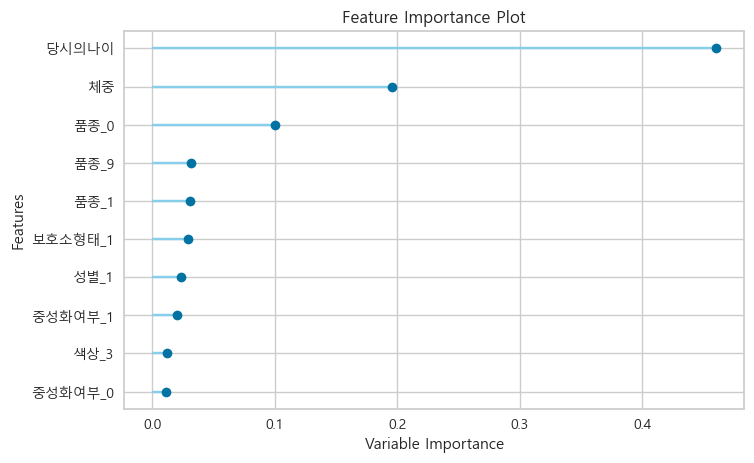

In [298]:
plot_model(tuned_lightgbm, plot = 'feature')

In [296]:
stacker = stack_models(estimator_list = best3models[1:], meta_model = best3models[0], fold = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6644,0.7017,0.8104,0.6736,0.7357,0.2869,0.2962
1,0.6628,0.6996,0.8146,0.6708,0.7358,0.2820,0.2923
2,0.6563,0.6940,0.7884,0.6719,0.7255,0.2736,0.2799
Mean,0.6612,0.6985,0.8045,0.6721,0.7323,0.2808,0.2895
SD,0.0035,0.0032,0.0115,0.0011,0.0048,0.0055,0.0070


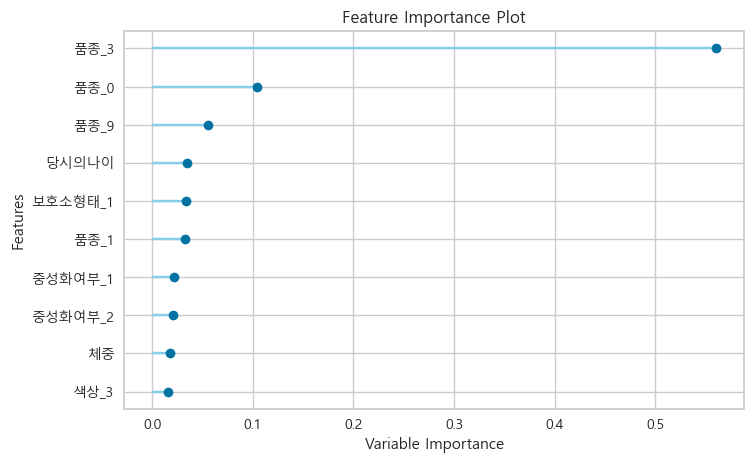

In [111]:
plot_model(xgboost, plot = 'feature')

In [112]:
catboost = create_model('catboost', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6935,0.7029,0.3815,0.6623,0.4841,0.2879,0.3101
1,0.6932,0.7014,0.3803,0.6618,0.4830,0.2868,0.3091
2,0.6906,0.7026,0.3738,0.6576,0.4767,0.2800,0.3025
3,0.6898,0.6993,0.3767,0.6534,0.4779,0.2792,0.3007
4,0.6923,0.7006,0.3779,0.6603,0.4807,0.2843,0.3067
Mean,0.6919,0.7014,0.3781,0.6591,0.4805,0.2837,0.3058
SD,0.0015,0.0013,0.0027,0.0033,0.0029,0.0035,0.0037


In [113]:
catboost

In [114]:
tuned_catboost = tune_model(catboost, fold = 5, optimize = 'Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6927,0.7022,0.3728,0.6645,0.4776,0.2835,0.3073
1,0.6936,0.7009,0.3751,0.6661,0.4799,0.2860,0.3097
2,0.6897,0.7027,0.3665,0.6590,0.4710,0.2760,0.2998
3,0.6898,0.6982,0.3653,0.6598,0.4703,0.2757,0.2998
4,0.6916,0.7006,0.3703,0.6627,0.4751,0.2807,0.3046
Mean,0.6915,0.7009,0.3700,0.6624,0.4748,0.2804,0.3042
SD,0.0015,0.0016,0.0037,0.0027,0.0037,0.0041,0.0040


In [115]:
tuned_catboost

## Logistic

In [128]:
from sklearn.model_selection import train_test_split
X = df_no_mix[['품종', '색상', '성별', '체중', '중성화여부', '당시의나이', '보호소형태']]
y = df_no_mix['상태']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23)

In [129]:
X_train.isna().sum()

품종       0
색상       0
성별       0
체중       0
중성화여부    0
당시의나이    0
보호소형태    0
dtype: int64

In [130]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [131]:
pred = model.predict(X_test)

print('Logistic 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

Logistic 정확도 : 0.6357


---

In [132]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmsle(y, pred) : 
    log_y = np.log1(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) **2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

In [133]:
def rmse(y, pred) : 
    return np.sqrt(mean_squred_error(y, pred))

In [134]:
def evaluate_regr(y, pred) : 
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    mae_val = mean_absolute_error(y, pred)
    pritn('RMSLE : [0:.3f], RMSE : {1:.3f}, MAE : {2:.3f}'.format(rmsle_val, rmse_val, mae_val))

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso


In [256]:
df_no_mix['품종'].value_counts()

7    38522
4    24494
0    16734
5     7141
8     3818
2     3805
1     3379
9     2194
6      684
Name: 품종, dtype: int64

In [206]:
scale = df_no_mix[['체중','당시의나이']]

In [233]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
# scaler = MinMaxScaler()
scaler.fit(scale)
scaled = scaler.transform(scale)
scaled = pd.DataFrame(data = scaled, columns = scale.columns)



In [234]:
scaled

,체중,당시의나이
0,-0.603070,-0.103570
1,-0.650797,-0.449952
2,-0.480341,-0.796333
3,-0.616706,0.589194
4,-0.343977,0.935576
...,...,...
100766,-0.207612,-1.142715
100767,0.065117,-1.142715
100768,-0.772162,-1.142715
100769,-0.787162,-1.142715


In [236]:
df_no_mix['체중스케일'] = scaled['체중'].values

In [237]:
df_no_mix.loc[:,'나이스케일'] = scaled['당시의나이'].values

In [238]:
df_no_mix.columns

Index(['품종', '색상', '성별', '중성화여부', '보호소형태', '상태', '체중스케일', '나이스케일'], dtype='object')

In [239]:
df_no_mix = df_no_mix[['품종', '색상', '성별', '중성화여부', '보호소형태', '상태', '체중스케일','나이스케일']]

In [240]:
df_no_mix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100771 entries, 0 to 361194
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   품종      100771 non-null  int64  
 1   색상      100771 non-null  int64  
 2   성별      100771 non-null  int64  
 3   중성화여부   100771 non-null  int64  
 4   보호소형태   100771 non-null  int64  
 5   상태      100771 non-null  int64  
 6   체중스케일   100771 non-null  float64
 7   나이스케일   100771 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 6.9 MB


In [241]:
df_no_mix

,품종,색상,성별,중성화여부,보호소형태,상태,체중스케일,나이스케일
0,7,1,0,0,1,1,-0.603070,-0.103570
2,4,4,1,0,1,1,-0.650797,-0.449952
3,4,3,0,1,1,1,-0.480341,-0.796333
4,7,3,1,1,1,1,-0.616706,0.589194
5,7,5,1,1,1,0,-0.343977,0.935576
...,...,...,...,...,...,...,...,...
361190,9,1,1,0,0,0,-0.207612,-1.142715
361191,9,3,0,0,0,0,0.065117,-1.142715
361192,9,5,1,0,0,0,-0.772162,-1.142715
361193,9,1,0,0,0,0,-0.787162,-1.142715


In [242]:
df_no_mix

,품종,색상,성별,중성화여부,보호소형태,상태,체중스케일,나이스케일
0,7,1,0,0,1,1,-0.603070,-0.103570
2,4,4,1,0,1,1,-0.650797,-0.449952
3,4,3,0,1,1,1,-0.480341,-0.796333
4,7,3,1,1,1,1,-0.616706,0.589194
5,7,5,1,1,1,0,-0.343977,0.935576
...,...,...,...,...,...,...,...,...
361190,9,1,1,0,0,0,-0.207612,-1.142715
361191,9,3,0,0,0,0,0.065117,-1.142715
361192,9,5,1,0,0,0,-0.772162,-1.142715
361193,9,1,0,0,0,0,-0.787162,-1.142715
